<a href="https://colab.research.google.com/github/Romy-Vishwakarma/Python_works/blob/main/EDA_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Exploratory Data Analysis (EDA)?*

Exploratory Data Analysis (EDA) is the process of understanding and summarizing the main features of a dataset, often using visual methods. This step is crucial before applying machine learning models, as it helps identify patterns, relationships, and insights within the data.

*Why is EDA Important?*

EDA is essential because it allows you to:

- Understand the distribution of variables
- Identify missing values and outliers
- Discover relationships between variables
- Develop a problem statement or hypothesis
- Inform feature engineering and model selection

*How to Perform EDA?*

The approach to EDA varies depending on the dataset and goals. However, some common techniques and plots used in EDA include:

- Histograms and density plots to visualize distributions
- Box plots and violin plots to identify outliers and skewness
- Scatter plots and correlation matrices to explore relationships
- Bar charts and heatmaps to visualize categorical data

There is no one-size-fits-all approach to EDA, and the process can be iterative and time-consuming. The key is to explore the data thoroughly to gain insights and inform subsequent analysis and modeling steps.

In [1]:
import pandas as pd #data
import numpy as np #numerical mean, std,percentiles
import matplotlib.pyplot as plt #
#%matplotlib inline #if you are working with other IDE of python
import seaborn as sns #seaborn

In [2]:
df = pd.read_csv("/content/Telco-Customer-Churn-checkpoint.csv")
#sheet_name, encoding
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['SeniorCitizen'].value_counts()

#todo : 0,1 -> No,Yes

,count
SeniorCitizen,
0,5901
1,1142


In [4]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [5]:
df.shape

(7043, 21)

In [6]:
df.count() #count of rows which has values(not null values)

,0
customerID,7043
gender,7043
SeniorCitizen,7043
Partner,7043
Dependents,7043
tenure,7043
PhoneService,7043
MultipleLines,7043
InternetService,7043
OnlineSecurity,7043


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.select_dtypes(include=['int64','float64']).corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [16]:
df['TotalCharges'].value_counts()
sum(df['TotalCharges'] == " ") #we have " "(space in 11 rows for TotalCharges which we need to handle)

11

In [17]:
df['TotalCharges'] = df['TotalCharges'].replace(' ','0')
print("Replaced space with 0 to handle Totalcharges back to float")

Replaced space with 0 to handle Totalcharges back to float


In [18]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
0,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [19]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

print("Converted to float")

Converted to float


In [22]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [23]:
df.select_dtypes(include=['int64','float64']).corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


In [21]:
df.corr()

ValueError: could not convert string to float: '7590-VHVEG'

In [24]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [26]:
df['customerID'].duplicated().sum()

#df['customerID'].drop_duplicate() ( to drop duplicates)

np.int64(0)

In [27]:
df['SeniorCitizen'].value_counts().index

Index([0, 1], dtype='int64', name='SeniorCitizen')

In [28]:
#apply,map,applymap
df1 = pd.DataFrame({'A':['Yes','No','Maybe'],'B':[100,200,400]})

percent= lambda x:x/100

df1['B'].map(percent)


#DataFrame & Series


,B
0,1.0
1,2.0
2,4.0


In [29]:
#apply

def conversion(value):
    if value ==0:
        return "No"
    else:
        return "Yes"
print("Converting value")
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conversion)
print("Done")

Converting value
Done


In [30]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
No,5901
Yes,1142


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df = df.drop(columns=('OnlineBackup'),axis = 1)
print("Done")

#2D rows/columns
#axis = 0 , axis = 1

Done


In [33]:
if "OnlineBackup" in df.columns:
    print("Yes")
else:
    print("No")

No


In [34]:
#df = df.rename(columns={'Dependents':'No of Users'})

df.rename(columns={'Dependents':'No of Users'},inplace = True) #perm. change
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'No of Users',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'No of Users',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
import numpy as np
df_employees = pd.DataFrame({'EmployeeId':[1,2,3,4,5],'Name':['Susmita','Devishree','Pavana','Kavita','Harshitha'],
                             'salary':[5,6.2,np.nan,7,5.5]})


#mean/median(numerical) #recommended
mean_value = df_employees['salary'].mean()
df_employees['salary'] = df_employees['salary'].fillna(mean_value)

df_employees

,EmployeeId,Name,salary
0,1,Susmita,5.000
1,2,Devishree,6.200
2,3,Pavana,5.925
3,4,Kavita,7.000
4,5,Harshitha,5.500


In [37]:
#merge, joins,pivot_table using pandas and why would use this in EDA



/tmp/ipython-input-1684427664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt_ax = sns.countplot(data=df,x='Churn',palette='Set2') #plot object


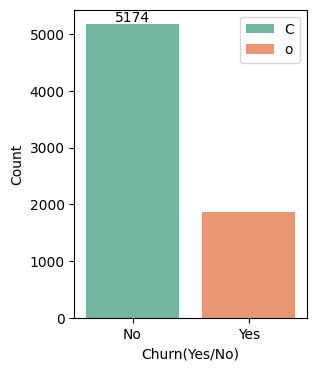

In [38]:
plt.figure(figsize=(3,4))
plt_ax = sns.countplot(data=df,x='Churn',palette='Set2') #plot object
plt_ax.bar_label(plt_ax.containers[0])
plt.xlabel('Churn(Yes/No)')
plt.ylabel('Count')
plt.legend('Counting Churn Data')
plt.savefig("Counting Churn Data.png",dpi=2000)
plt.show()

/tmp/ipython-input-1239227079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,x = "Churn",palette='cool')


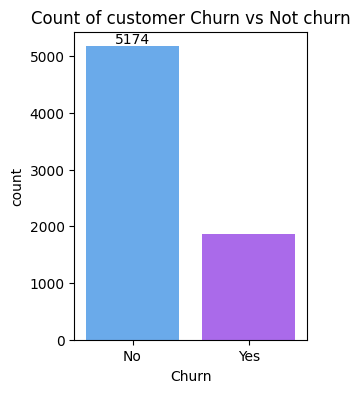

In [39]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data=df,x = "Churn",palette='cool')
ax.bar_label(ax.containers[0])

plt.title("Count of customer Churn vs Not churn")
plt.savefig("Count of customer Churn vs Not churn.png",dpi=2000,bbox_inches ="tight")
#bbox_inches = tight (to ignore area around plot)
plt.show()

In [40]:
5174/(5174+1869)
#no : 73%

#imbalance class in my target distribution
#tree models

#simple models

#yes : 0.1-0.2
# no : 99% #logistic

#8-9krows,10 columns

#big data
#100000,37 col

0.7346301292063041

In [41]:
group_totalcharges = df.groupby('SeniorCitizen').agg({'Churn':'count'}) #Yes/no
group_totalcharges

,Churn
SeniorCitizen,
No,5901
Yes,1142


In [42]:
plt.figure(figsize=(3,4))
gp = df.groupby('Churn').agg({'Churn':'count'})

print(gp)
# print(gp['Churn'])
print(gp.index)

       Churn
Churn       
No      5174
Yes     1869
Index(['No', 'Yes'], dtype='object', name='Churn')


<Figure size 300x400 with 0 Axes>

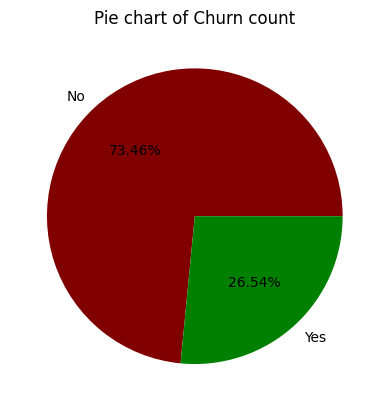

In [43]:
mycolors = ["maroon",'green']
plt.pie(gp['Churn'],labels=gp.index,autopct = "%1.2f%%",colors=mycolors)
plt.title("Pie chart of Churn count")
plt.show()

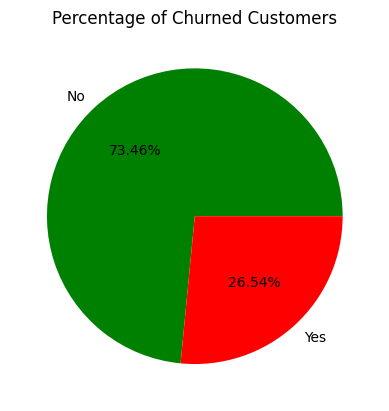

In [44]:
mycolors = ['green','red']
plt.pie(gp['Churn'],labels = gp.index,autopct = "%1.2f%%",colors=mycolors)
plt.title("Percentage of Churned Customers")
plt.savefig("Percentage of Churned Customers.png",dpi=2000)
plt.show()

From the give pie chart we can conclude that 26.54% of our customer have churned out. Now let's explore the reason behind it


In [45]:
gp_tenure = df.groupby('Churn').agg({'tenure':'mean'})
gp_tenure

,tenure
Churn,
No,37.569965
Yes,17.979133


[<BarContainer object of 2 artists>, <BarContainer object of 2 artists>]


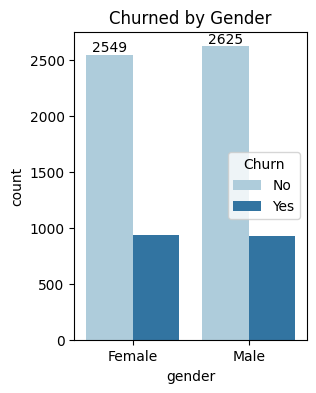

In [46]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = "gender",data = df,hue = "Churn",palette='Paired')
print(ax.containers)
ax.bar_label(ax.containers[0])
plt.title("Churned by Gender")
#plt.savefig("Churned by Gender.png",dpi=2000 ,bbox_inches="tight")
plt.show()

https://seaborn.pydata.org/tutorial/color_palettes.html

/tmp/ipython-input-3590719774.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Not staying", "Staying"])


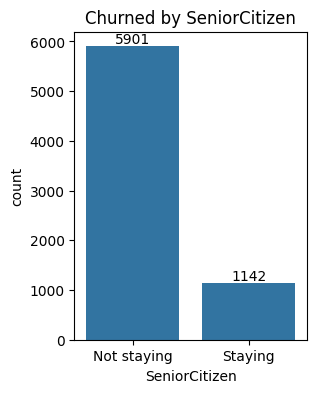

In [47]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("Churned by SeniorCitizen")
ax.set_xticklabels(["Not staying", "Staying"])
plt.savefig("Churned by SeniorCitizen.png",dpi=2000)
plt.show()

In [48]:
#crosstab
ct = pd.crosstab(df['SeniorCitizen'],df['Churn']) #creates freq like a pivot table
print(ct)

#pandas : axis = 1 : col , axis =0 , row
print(ct.div(ct.sum(axis=1), axis=0)*100)


Churn            No   Yes
SeniorCitizen            
No             4508  1393
Yes             666   476
Churn                 No        Yes
SeniorCitizen                      
No             76.393832  23.606168
Yes            58.318739  41.681261


In [49]:
ct.div(ct.sum(axis=1), axis=0)*100

Churn,No,Yes
SeniorCitizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261


In [50]:
ct.sum(axis=1)

,0
SeniorCitizen,
No,5901
Yes,1142


In [51]:
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
ct_pct.index

Index(['No', 'Yes'], dtype='object', name='SeniorCitizen')

In [54]:
gb = df.groupby('SeniorCitizen')['Churn'].value_counts()
gb


SeniorCitizen  Churn
No             No       4508
               Yes      1393
Yes            No        666
               Yes       476
Name: count, dtype: int64

In [58]:
gb = df.groupby('SeniorCitizen').agg({'Churn':'count'})  #groups data uses aggregate(uses sum,mean,count,min,max)

gb
#SC : 0 > 5901 ( Yes/No)
#SC : 1 > 1142( Yes/No)

,Churn
SeniorCitizen,
No,5901
Yes,1142


In [59]:
print(range(len(ct_pct.index)))

range(0, 2)


[<BarContainer object of 2 artists>, <BarContainer object of 2 artists>]


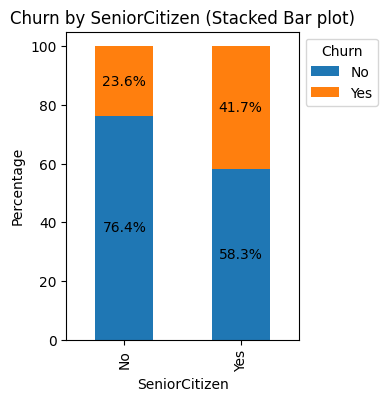

In [60]:
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"])
#crosstab counts how many senior citizen falls in Churn : Yes or No
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
#counts -> percetange
#first calculate sum across row ,then divide each value by total and * 100


#print(ct_pct)
ax = ct_pct.plot(kind="bar" ,stacked = True ,figsize=(3,4))

plt.title("Churn by SeniorCitizen (Stacked Bar plot)")
plt.ylabel("Percentage")
print(ax.containers)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

ax.set_xticks(range(len(ct_pct.index)))
ax.set_xticklabels(["No", "Yes"])   # 0 → No, 1 → Yes
plt.legend(title="Churn",bbox_to_anchor = (1,1)) #legend coordinate
#plt.savefig("Churn by SeniorCitizen(Stacke Bar plot).png",dpi=2000 ,bbox_inches="tight")
plt.show()

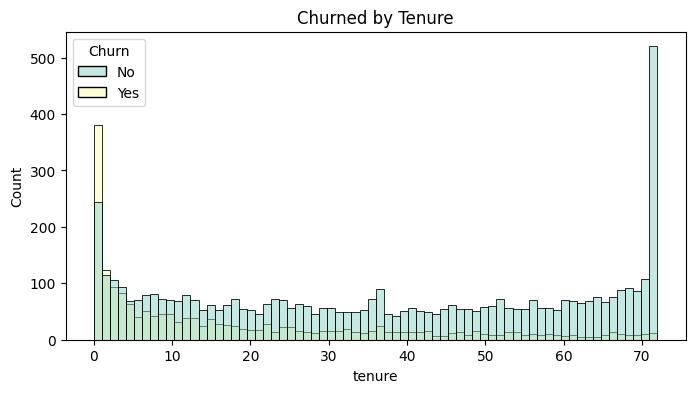

In [61]:
plt.figure(figsize = (8,4))
sns.histplot(x = "tenure" ,data =df,bins = 70,hue = "Churn",palette = "Set3")
plt.title("Churned by Tenure")
#plt.savefig("Churned by Tenure.png",dpi=2000)
plt.show()

People who have used services for a longer time stayed and people who used our services per 1 or 2 months have Churned



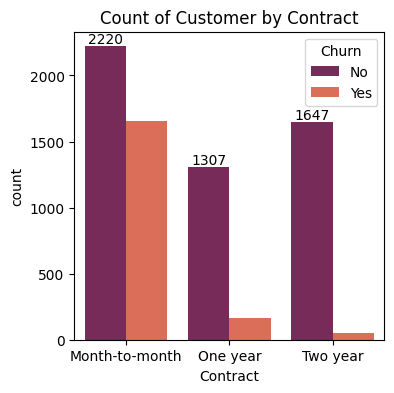

In [62]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract",data = df, hue = "Churn",palette = "rocket")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
#plt.savefig("Count of Customer By Contract.png",dpi=2000 ,bbox_inches="tight")
plt.show()

People who have month-to-month contract are likely to churn then from those who have 1 or 2 year

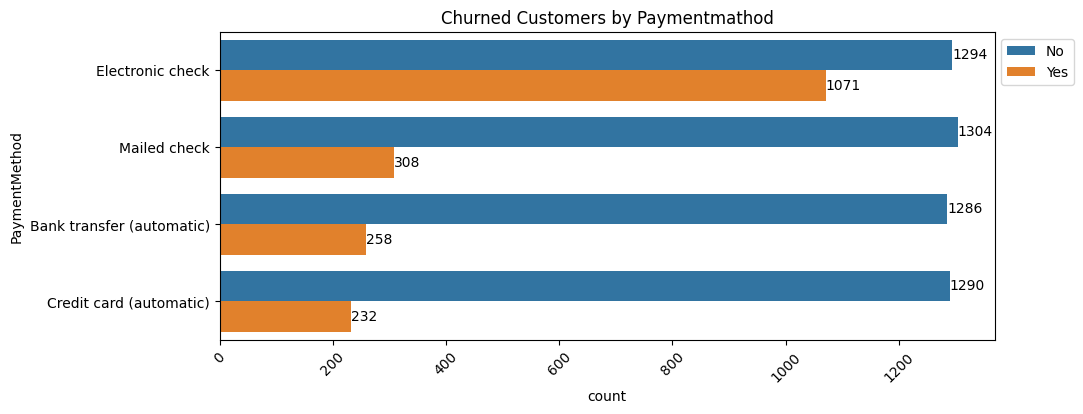

In [63]:
plt.figure(figsize = (10,4))
ax = sns.countplot(y = "PaymentMethod", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Paymentmathod")
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1,1))
#plt.savefig("Churned Customers by Paymentmathod.png",dpi=2000 ,bbox_inches="tight")
plt.show()

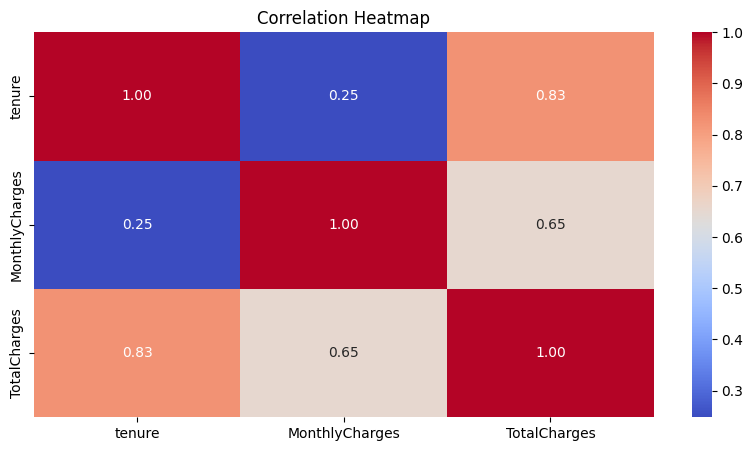

In [65]:
# Correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr()
, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   No of Users       7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [67]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [68]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,No of Users,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


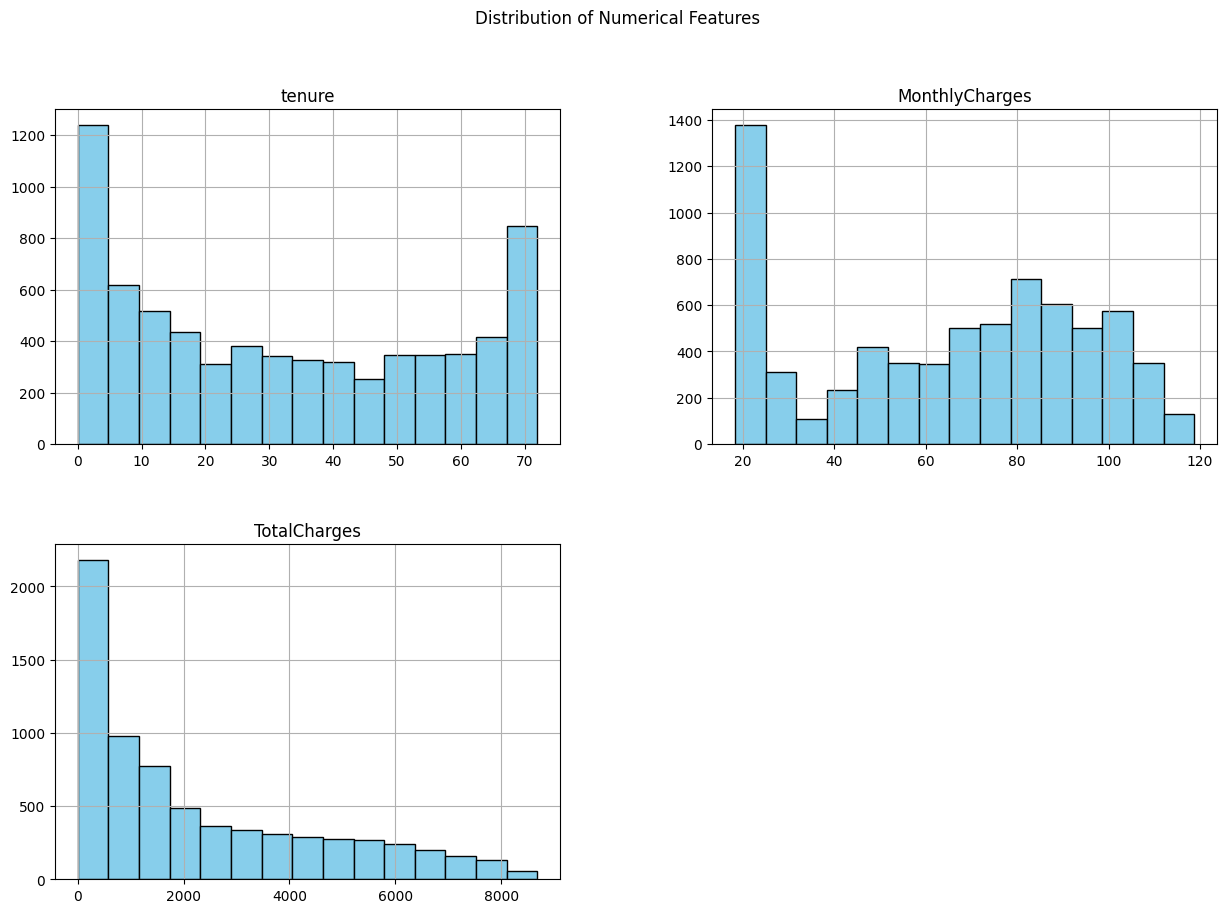

In [69]:
# Analyze numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

<Figure size 800x400 with 0 Axes>

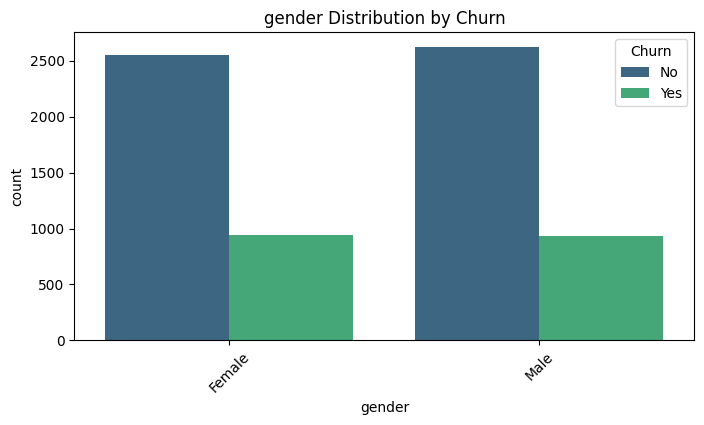

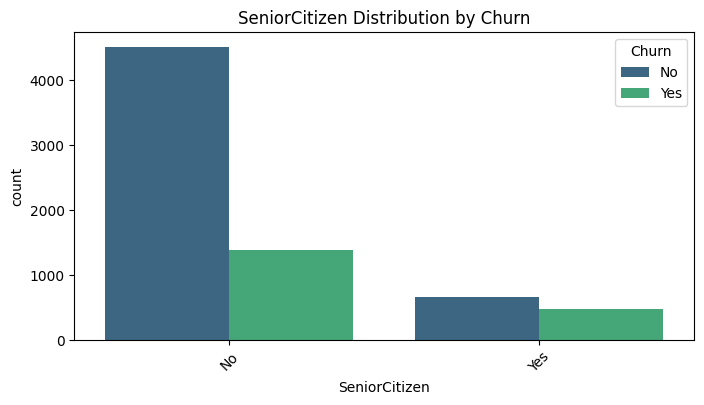

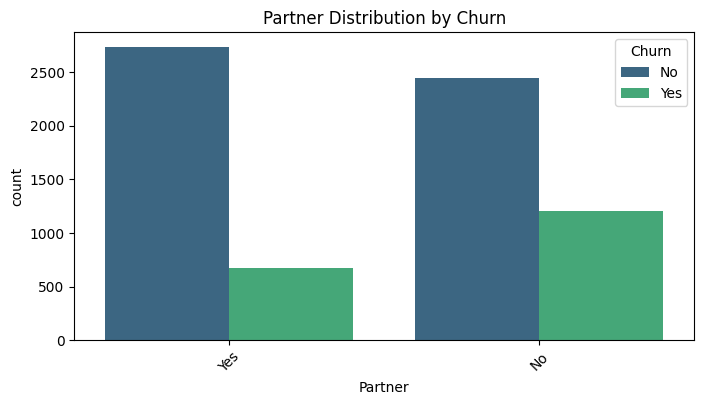

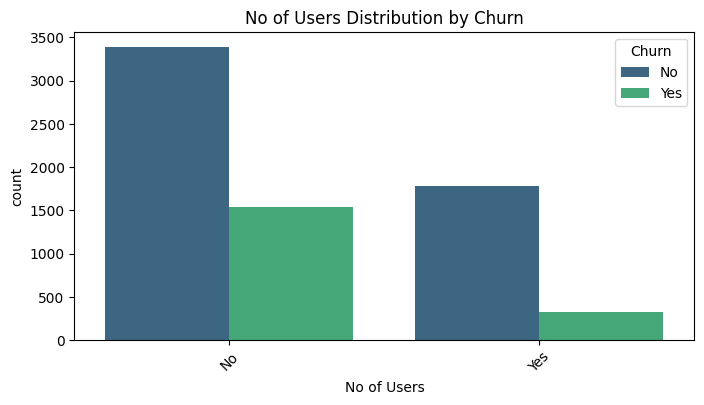

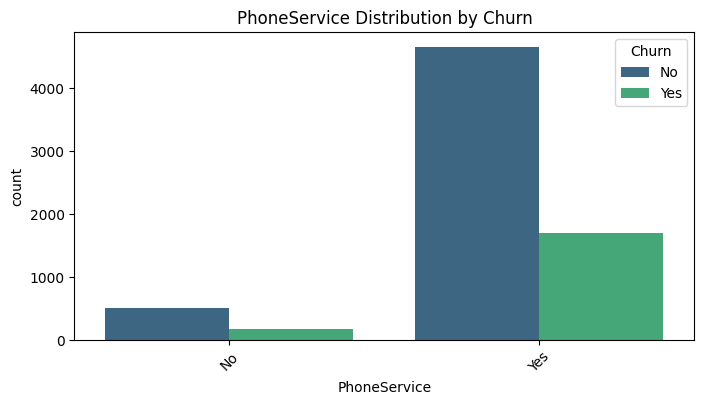

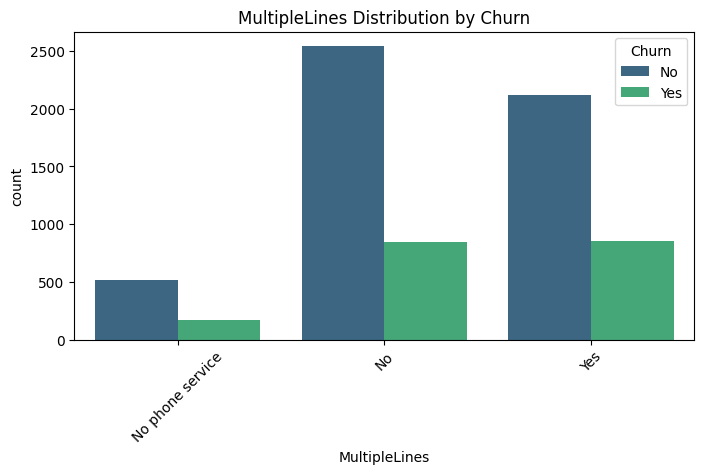

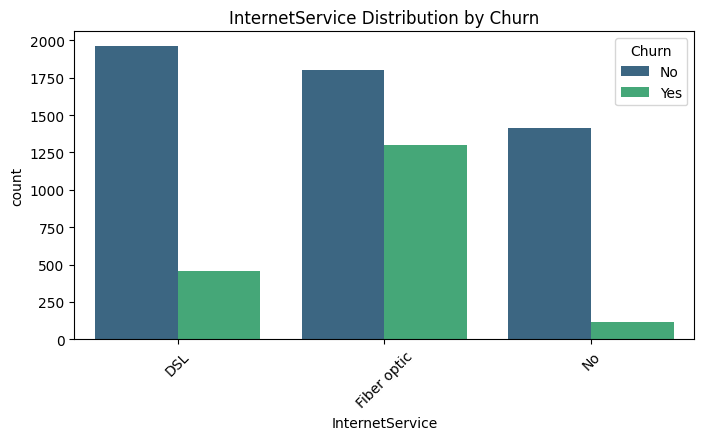

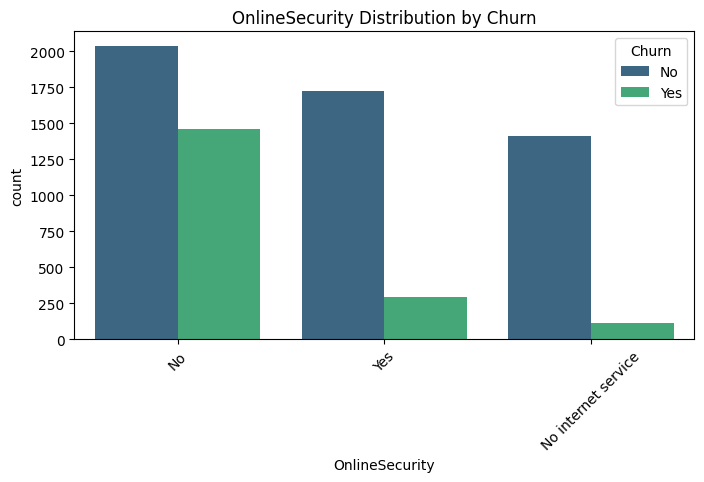

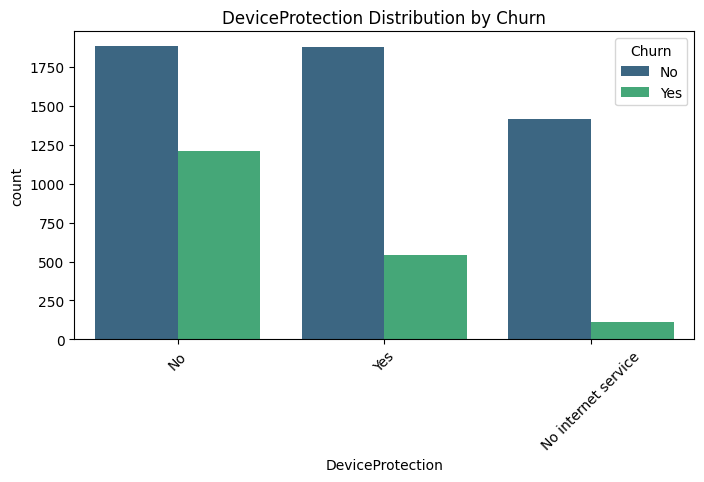

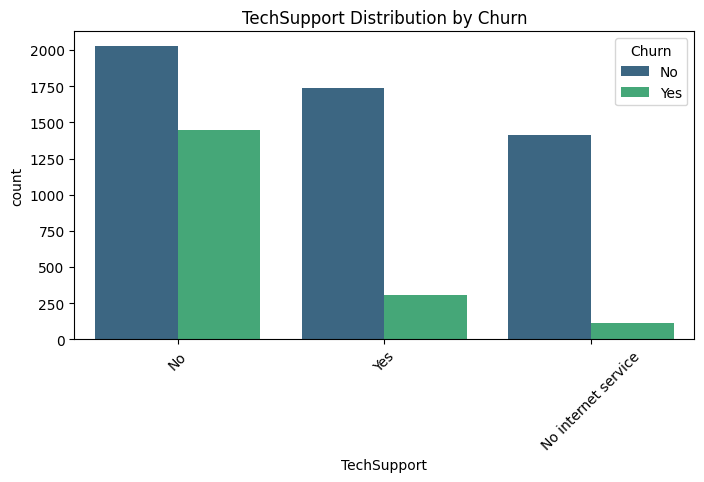

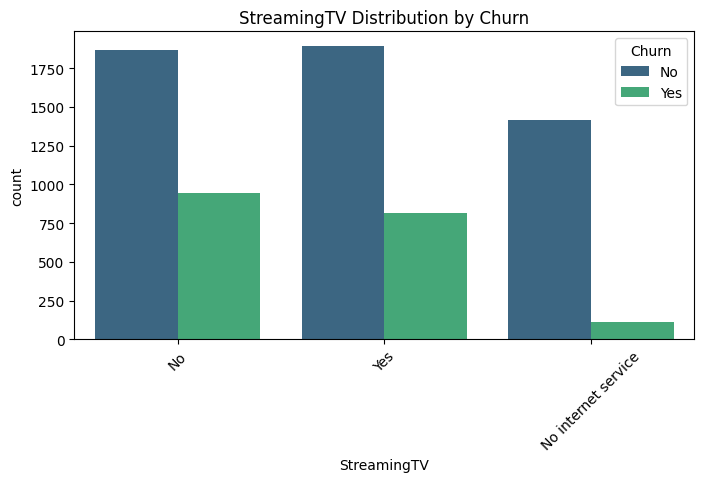

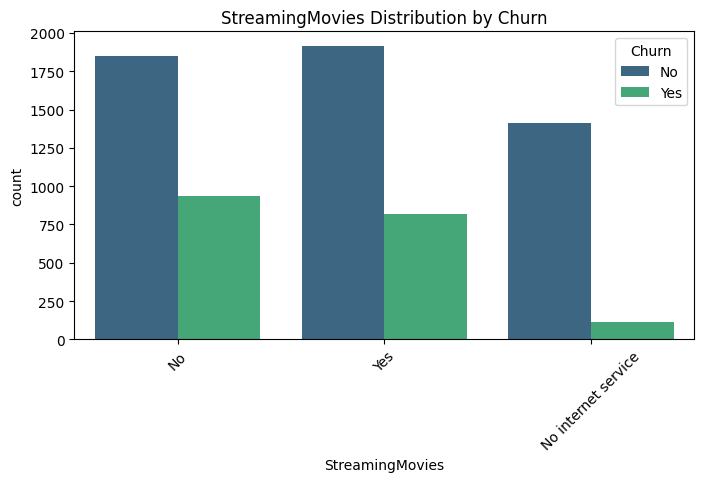

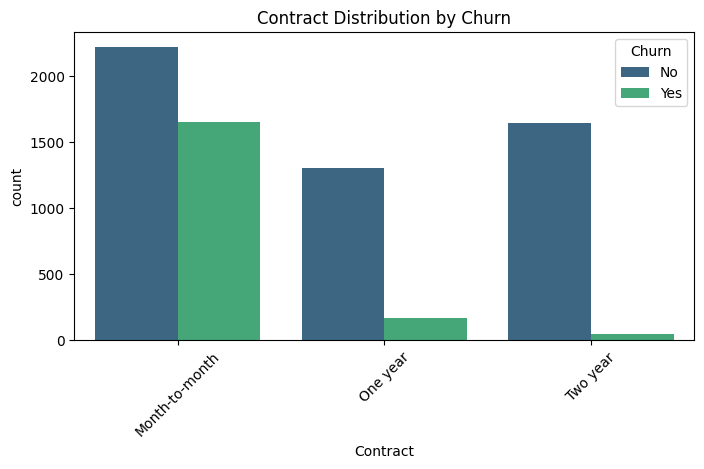

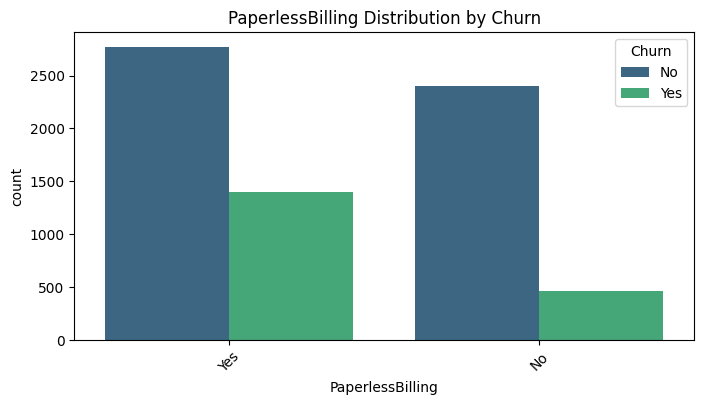

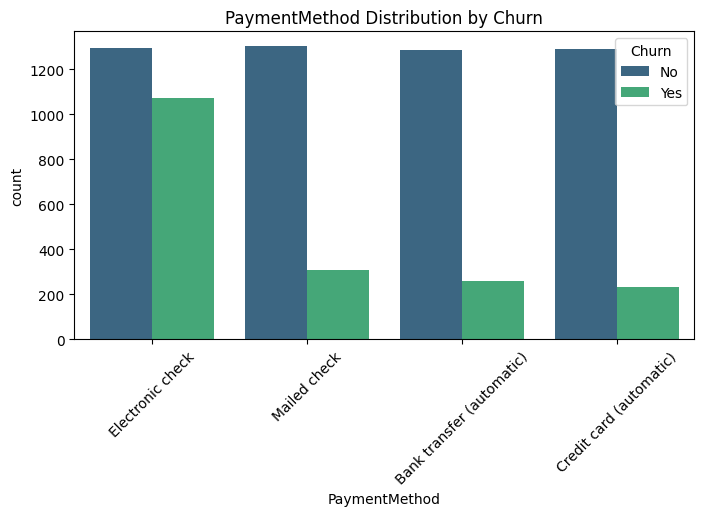

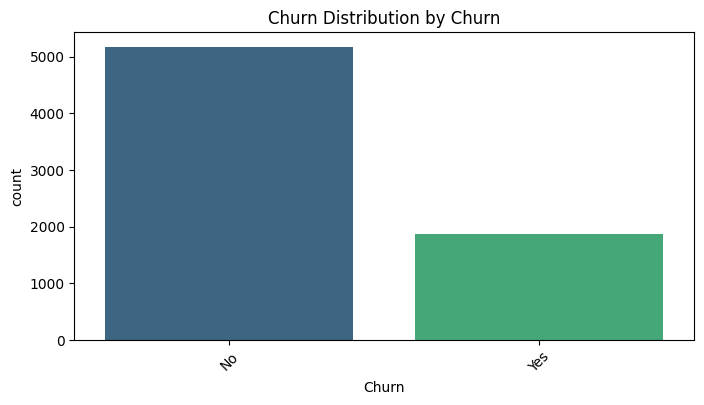

In [70]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    if col == 'customerID':
        pass
    else:
        sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
        plt.title(f'{col} Distribution by Churn')
        plt.xticks(rotation=45)
        plt.show()